# Question 3: Data Pipeline and Transformation

Objective:
- Show understanding of creating data pipelines and transformations.

Task:
- Using the CSV file from Question 1, filter the data to include only 'Copper' and 'Zinc' for the year 2020 & 2021.
- Calculate MACD (slow/medium/fast) and RSI for each metal historically.
- Use SQL inserts to populate the SQL table created in Question 2 with this generated data.
- Demonstrate the use of a decorator to log the execution of the SQL inserts.

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = f'{os.pardir}/data/MarketData.csv'

In [2]:
# Load the data 
raw_df = pd.read_csv(data_path)
raw_df

,Start Date,01/01/2010,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,End Date,01/01/2023,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,LME COPPER 3MO ($),LME ALUMINUM 3MO ($),LME ZINC 3MO ($),LME LEAD 3MO ($),LME TIN 3MO ($),Generic 1st 'CL' Future
3,NaN,LMCADS03 Comdty,LMAHDS03 Comdty,LMZSDS03 Comdty,LMPBDS03 Comdty,LMSNDS03 Comdty,CL1 Comdty
4,NaN,Settlement Price,Settlement Price,Settlement Price,Settlement Price,Settlement Price,Settlement Price
...,...,...,...,...,...,...,...
3392,26/12/2022,8349.5,2389.5,2965,2273.5,23934,79.56
3393,27/12/2022,8349.5,2389.5,2965,2273.5,23934,79.53
3394,28/12/2022,8443,2381,3005.5,2218,24734,78.96
3395,29/12/2022,8418,2405,2984.5,2272.5,24915,78.4


In [3]:
# Select only Dates, Copper, and Zinc columns, the first 6 rows are other information
df = raw_df.iloc[6:, [0,1,3]].copy()
df.columns = ['Dates', 'Copper', 'Zinc']
# Ensure the data types are correct
df['Dates'] = pd.to_datetime(df['Dates'], format='%d/%m/%Y', errors='coerce')
df['Copper'] = pd.to_numeric(df['Copper'], errors='coerce')
df['Zinc'] = pd.to_numeric(df['Zinc'], errors='coerce')
# # Select only 2021
# df = df[(df['Dates'].dt.year == 2020) | (df['Dates'].dt.year == 2021)]
# Check there are no NaN values
print(df.isna().sum())
df

Dates     0
Copper    0
Zinc      0
dtype: int64


,Dates,Copper,Zinc
6,2010-01-01,7375.0,2560.0
7,2010-01-04,7500.0,2574.0
8,2010-01-05,7485.0,2575.0
9,2010-01-06,7660.0,2718.0
10,2010-01-07,7535.0,2607.0
...,...,...,...
3392,2022-12-26,8349.5,2965.0
3393,2022-12-27,8349.5,2965.0
3394,2022-12-28,8443.0,3005.5
3395,2022-12-29,8418.0,2984.5


In [4]:
# Add the MACD indictors for both metals
df['MACD_COPPER_medium'] = df['Copper'].ewm(span=12, adjust=False).mean() - df['Copper'].ewm(span=26, adjust=False).mean()
df['Signal_COPPER_medium'] = df['MACD_COPPER_medium'].ewm(span=9, adjust=False).mean()
df['MACD_COPPER_slow'] = df['Copper'].ewm(span=26, adjust=False).mean() - df['Copper'].ewm(span=50, adjust=False).mean() 
df['Signal_COPPER_slow'] = df['MACD_COPPER_slow'].ewm(span=9, adjust=False).mean()
df['MACD_COPPER_fast'] = df['Copper'].ewm(span=5, adjust=False).mean() - df['Copper'].ewm(span=12, adjust=False).mean()
df['Signal_COPPER_fast'] = df['MACD_COPPER_fast'].ewm(span=9, adjust=False).mean()

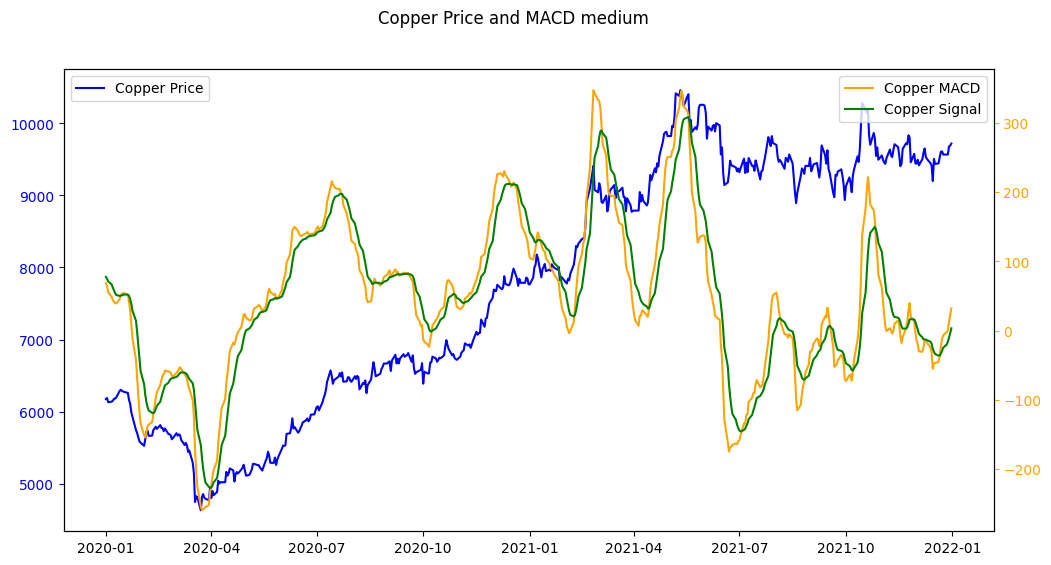

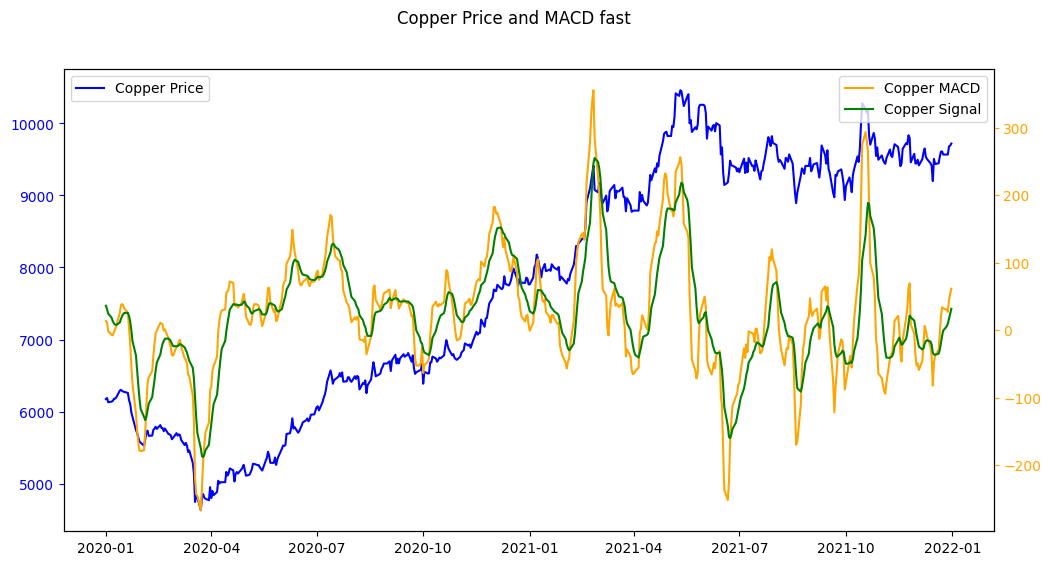

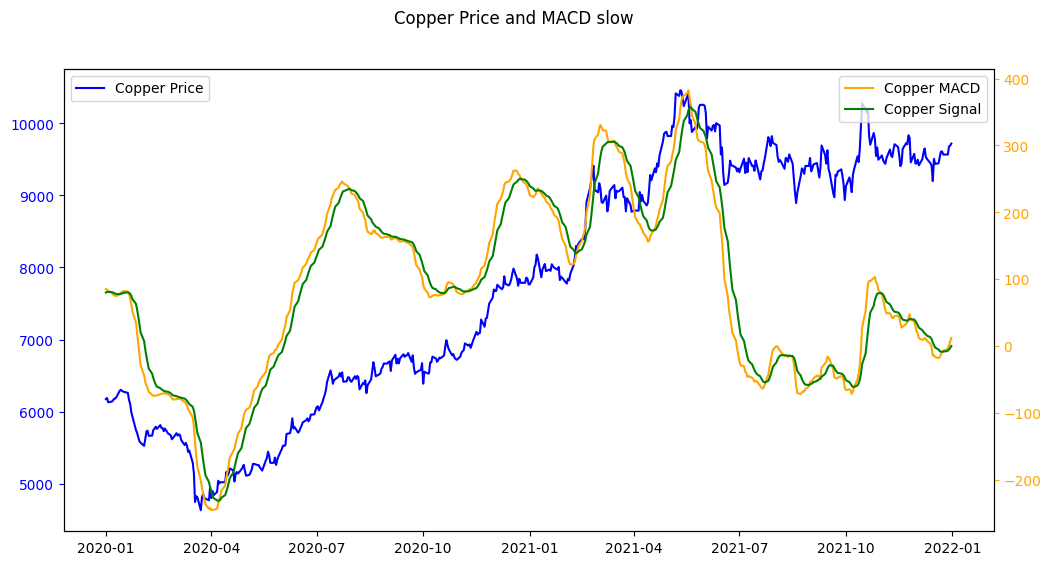

In [5]:
# Calculate Moving Average Convergence Divergence (MACD)
mask_years = df['Dates'].dt.year.isin([2020, 2021])

# Medium
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Copper Price and MACD medium')
ax = fig.add_subplot(111)
ax.plot(df[mask_years]['Dates'], df[mask_years]['Copper'], label='Copper Price', color='blue')
ax.tick_params(axis='y', colors='blue')
ax.legend(loc='upper left')
ax = ax.twinx()
ax.plot(df[mask_years]['Dates'], df[mask_years]['MACD_COPPER_medium'], label='Copper MACD', color='orange')
ax.plot(df[mask_years]['Dates'], df[mask_years]['Signal_COPPER_medium'], label='Copper Signal', color='green')
# give color to the y axis ticks
ax.tick_params(axis='y', colors='orange')
ax.legend(loc='upper right')

# Fast
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Copper Price and MACD fast')
ax = fig.add_subplot(111)
ax.plot(df[mask_years]['Dates'], df[mask_years]['Copper'], label='Copper Price', color='blue')
ax.tick_params(axis='y', colors='blue')
ax.legend(loc='upper left')
ax = ax.twinx()
ax.plot(df[mask_years]['Dates'], df[mask_years]['MACD_COPPER_fast'], label='Copper MACD', color='orange')
ax.plot(df[mask_years]['Dates'], df[mask_years]['Signal_COPPER_fast'], label='Copper Signal', color='green')
# give color to the y axis ticks
ax.tick_params(axis='y', colors='orange')
ax.legend(loc='upper right')

# Slow
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Copper Price and MACD slow')
ax = fig.add_subplot(111)
ax.plot(df[mask_years]['Dates'], df[mask_years]['Copper'], label='Copper Price', color='blue')
ax.tick_params(axis='y', colors='blue')
ax.legend(loc='upper left')
ax = ax.twinx()
ax.plot(df[mask_years]['Dates'], df[mask_years]['MACD_COPPER_slow'], label='Copper MACD', color='orange')
ax.plot(df[mask_years]['Dates'], df[mask_years]['Signal_COPPER_slow'], label='Copper Signal', color='green')
# give color to the y axis ticks
ax.tick_params(axis='y', colors='orange')
ax.legend(loc='upper right')
# Show the plots
plt.show()



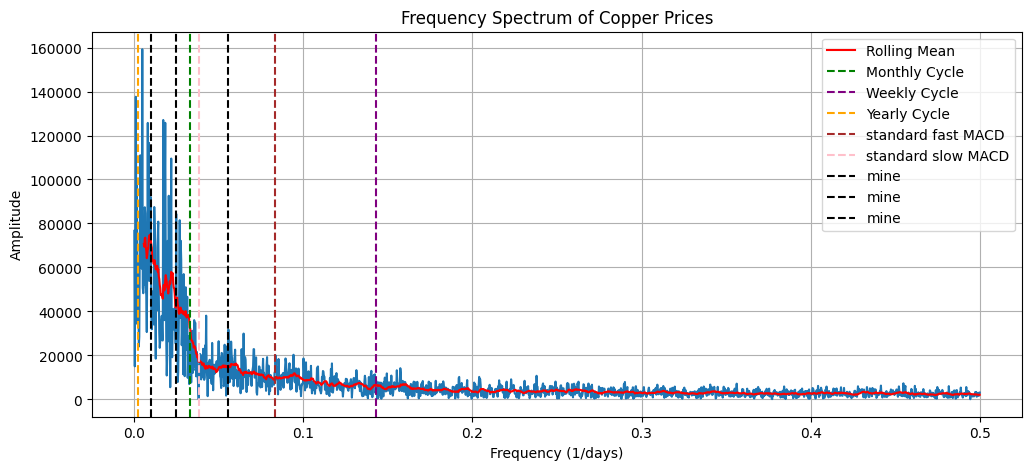

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Extract price signal
price = df['Copper'].values
n = len(price)
dt = 1  # 1 day between samples

# Detrend the signal (optional, but improves frequency resolution)
price_detrended = price - pd.Series(price).rolling(30, min_periods=1).mean()

# Perform Fourier Transform
freqs = fftfreq(n, d=dt)
fft_values = np.abs(fft(price_detrended))

# Only keep positive frequencies
pos_mask = freqs > 0
freqs = freqs[pos_mask]
fft_values = fft_values[pos_mask]

# Plot frequency spectrum
plt.figure(figsize=(12, 5))
plt.plot(freqs, fft_values)
plt.plot(freqs, pd.Series(fft_values).rolling(20).mean(), color='red', label='Rolling Mean')
plt.axvline(x=1/30, color='green', linestyle='--', label='Monthly Cycle')
plt.axvline(x=1/7, color='purple', linestyle='--', label='Weekly Cycle')
plt.axvline(x=1/365, color='orange', linestyle='--', label='Yearly Cycle')
plt.axvline(x=1/12, color='brown', linestyle='--', label='standard fast MACD')
plt.axvline(x=1/26, color='pink', linestyle='--', label='standard slow MACD')
plt.axvline(x=1/18, color='black', linestyle='--', label='mine')
plt.axvline(x=1/40, color='black', linestyle='--', label='mine')
plt.axvline(x=1/100, color='black', linestyle='--', label='mine')
plt.title('Frequency Spectrum of Copper Prices')
plt.xlabel('Frequency (1/days)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# apply moving average to the FFT values
